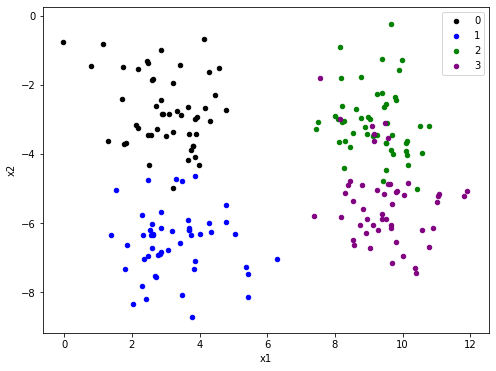

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs

#Define graphing function 
def graph_grouped(data_s, ax='ax', colors='colors', figsize=(8,6)):
    grouped_data = data_s.groupby('label')
    for key, group in grouped_data:
        group.plot(figsize=figsize, ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])

#Create labelled dataset
X, y = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1, random_state=30)
data_s = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], label=y))

#Graph labelled dataset
colors = {0:'black', 1:'blue', 2:'green', 3:'purple'}
fig, ax = plt.subplots()
graph_grouped(data_s, ax, colors)
plt.show()

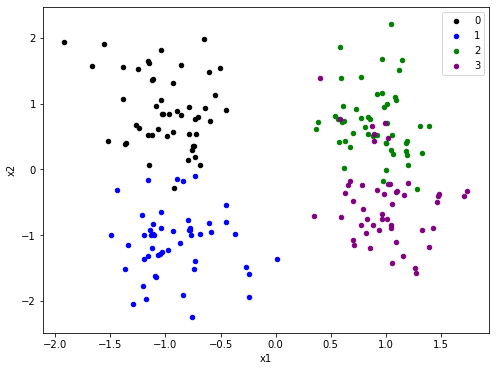

In [3]:
#Standardize dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(X)
data_s = pd.DataFrame(dict(x1=scaled[:,0], x2=scaled[:,1], label=y))

#Graph dataset
fig, ax = plt.subplots()
graph_grouped(data_s, ax, colors)
plt.show()

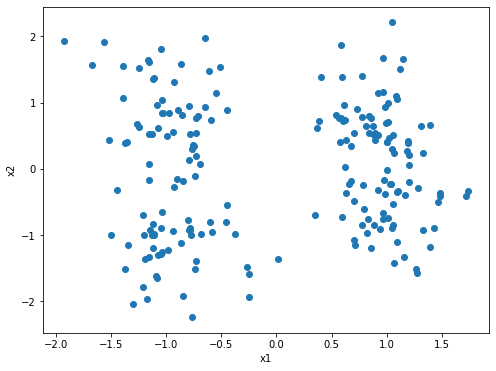

In [4]:
#Create unlabelled dataset
label = data_s[['label']]
data = data_s.iloc[:,:2]

#Graph unlabelled dataset
plt.figure(figsize=(8,6))
plt.scatter(data['x1'], data['x2'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Centroids:
[[ 0.54784675 -0.92085314]]
[[0.0472865  1.80185479]]
[[-0.95355146 -0.80603543]]
[[-1.65740333 -1.05275797]]
[[1.77222442 0.04531021]]


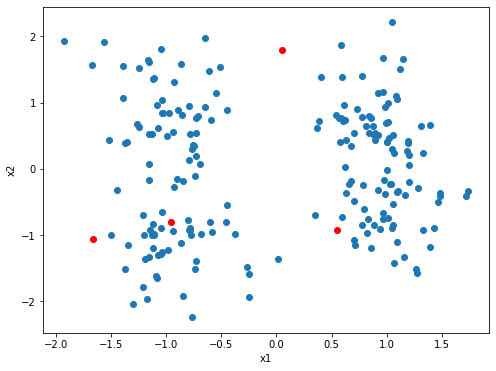

In [5]:
#Randomly generate 'centroids'
centroids = np.empty((1, 2))
print('Centroids:')
for i in range(0,5):
    new = (np.random.default_rng(seed=i).uniform(-2,2,2)).reshape(1,2)
    print(new)
    centroids = np.append(centroids, new, axis=0)
centroids = centroids[1:]
c_dict = {}
for i in range(4):
    c_dict[i] = centroids[i]

#Graph dataset with centroids
plt.figure(figsize=(8,6))
plt.scatter(data['x1'], data['x2'])
for i in range(4):
    plt.scatter(centroids[i][0], centroids[i][1], c='red')   
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [6]:
from scipy.spatial import distance

#Create function to determine closest centroid
def find_distance(x1, x2, c_dict):
    location = [x1, x2]
    smallest = 99
    closest = ""
    for key, value in c_dict.items():
        how_far = distance.euclidean(location, value)
        if how_far < smallest:
            closest = key
            smallest = how_far
    return closest

#Determine closest centroid to each datapoint
data['closest'] = data.apply(lambda row: find_distance(row['x1'], row['x2'], c_dict), axis=1)

In [18]:
def compare(data, data_s, centroids):
    colors = {0:'black', 1:'blue', 2:'green', 3:'purple'}
    fig, ax = plt.subplots()
    ax1 = plt.subplot(1,2,1)
    grouped_data = data.groupby('closest')
    for key, group in grouped_data:
        group.plot(figsize=(16,6), ax=ax1, kind='scatter', x='x1', y='x2', label=key, color=colors[key])
    for i in range(4):
        plt.scatter(centroids[i][0], centroids[i][1], c='red')

    ax2 = plt.subplot(1,2,2)
    grouped_data = data_s.groupby('label')
    for key, group in grouped_data:
        group.plot(figsize=(16,6), ax=ax2, kind='scatter', x='x1', y='x2', label=key, color=colors[key])
    plt.show()

In [15]:
colors

{0: 'black', 1: 'blue', 2: 'green', 3: 'purple'}

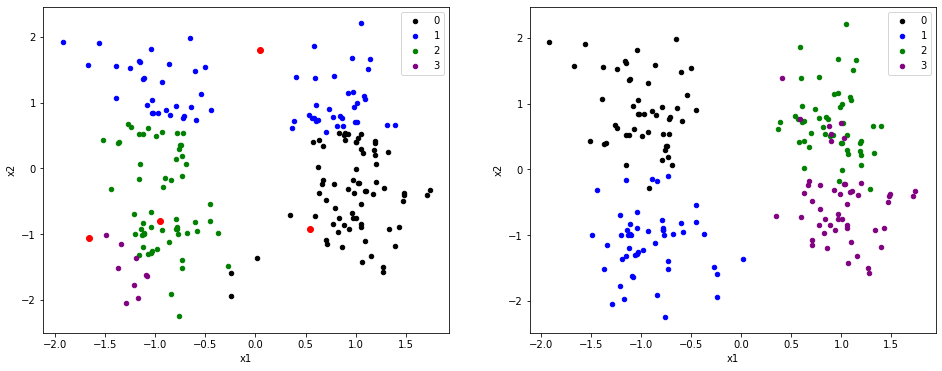

In [19]:
compare(data, data_s, centroids)

Centroids:
[ 0.96400419 -0.39808181]
[-0.03733491  1.12897117]
[-0.92884736 -0.50285685]
[-1.25056083 -1.56597326]


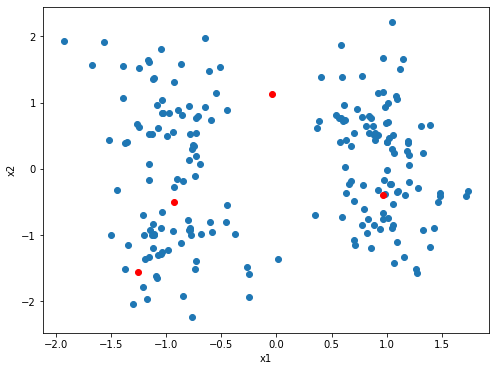

In [23]:
centroids = np.array(data.groupby('closest').mean())
print('Centroids:')
c_dict = {}
for i in range(4):
    c_dict[i] = centroids[i]
    print(c_dict[i])
plt.figure(figsize=(8,6))
plt.scatter(data['x1'], data['x2'])
for i in range(4):
    plt.scatter(centroids[i][0], centroids[i][1], c='red')   
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

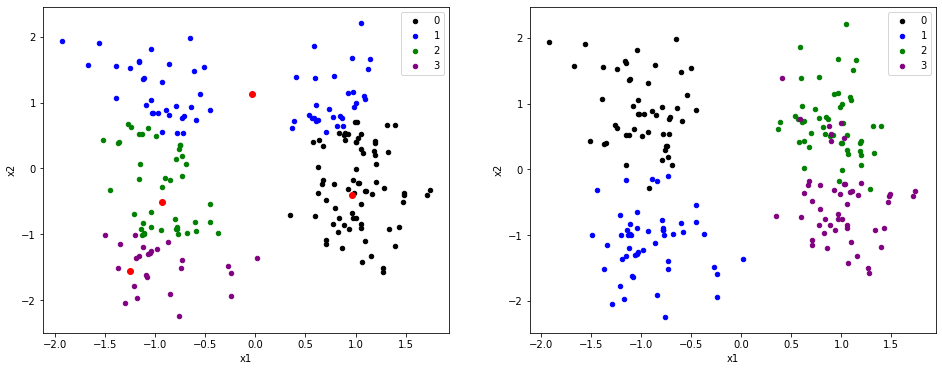

In [24]:
data['closest'] = data.apply(lambda row: find_distance(row['x1'], row['x2'], c_dict), axis=1)
compare(data, data_s, centroids)

In [25]:
def recenter(data, data_s):
    centroids = np.array(data.groupby('closest').mean())
    c_dict = {}
    for i in range(4):
        c_dict[i] = centroids[i]
    data['closest'] = data.apply(lambda row: find_distance(row['x1'], row['x2'], c_dict), axis=1)
    compare(data, data_s, centroids)
    return data

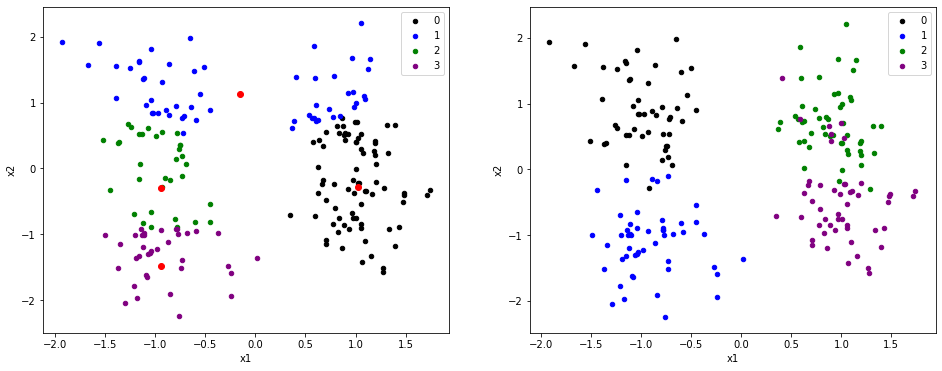

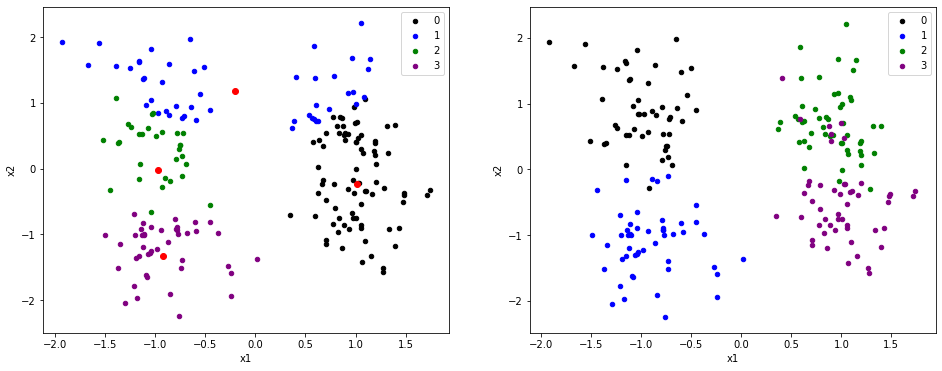

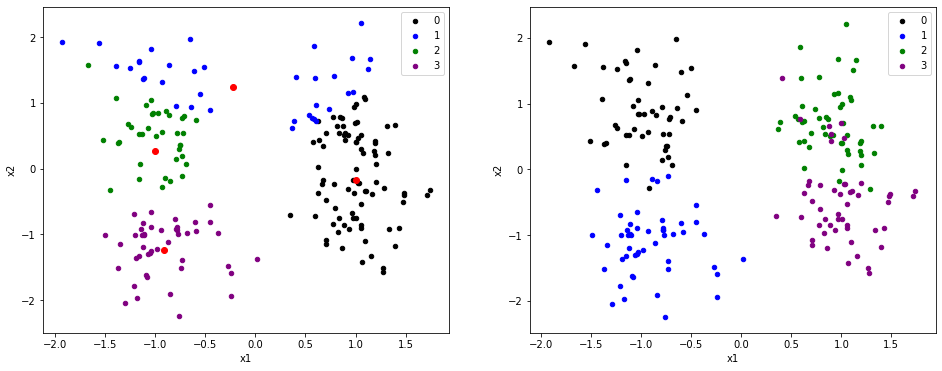

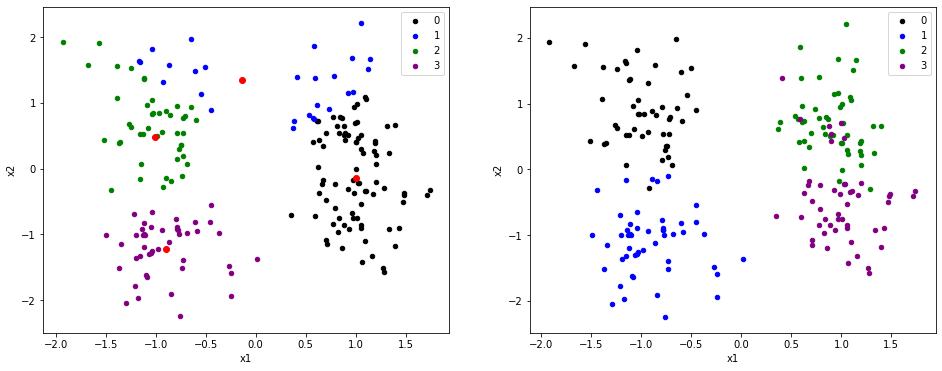

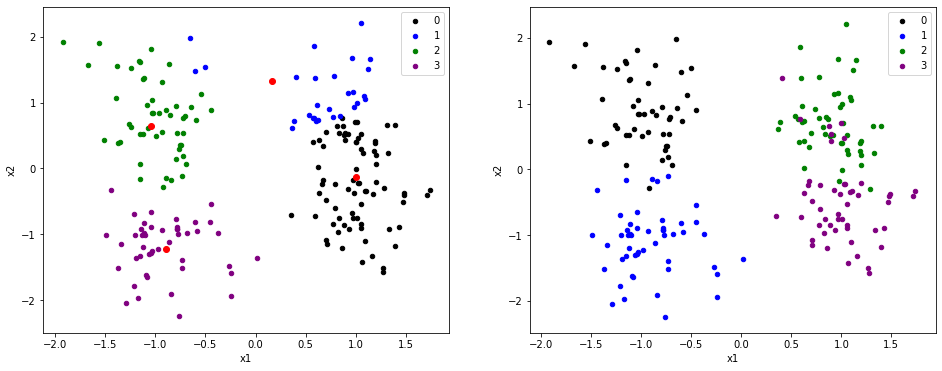

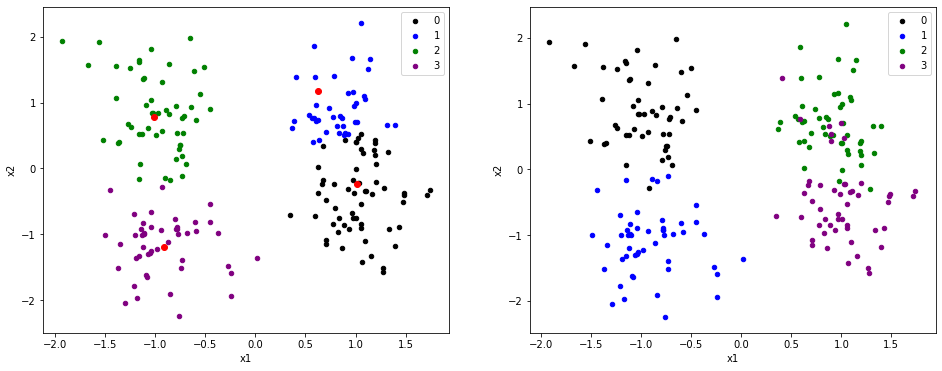

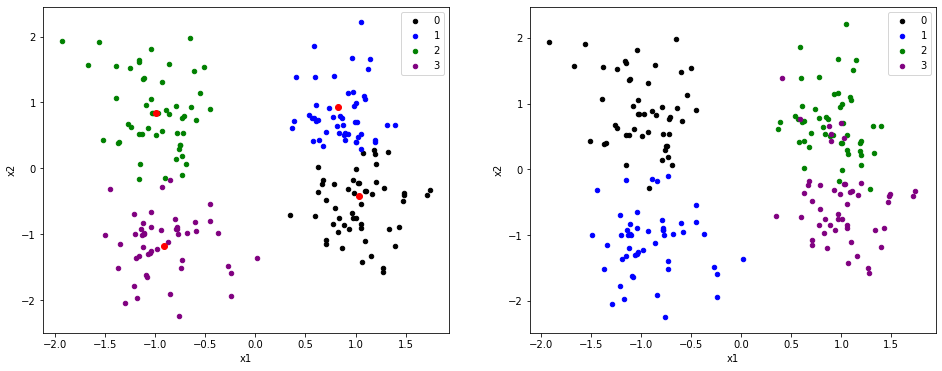

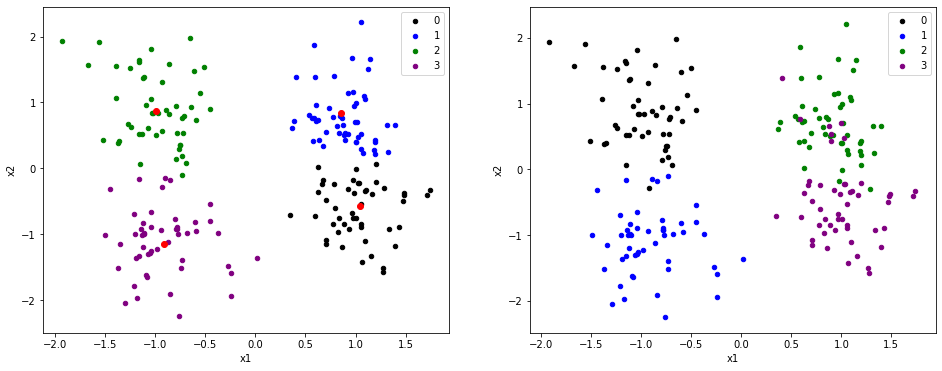

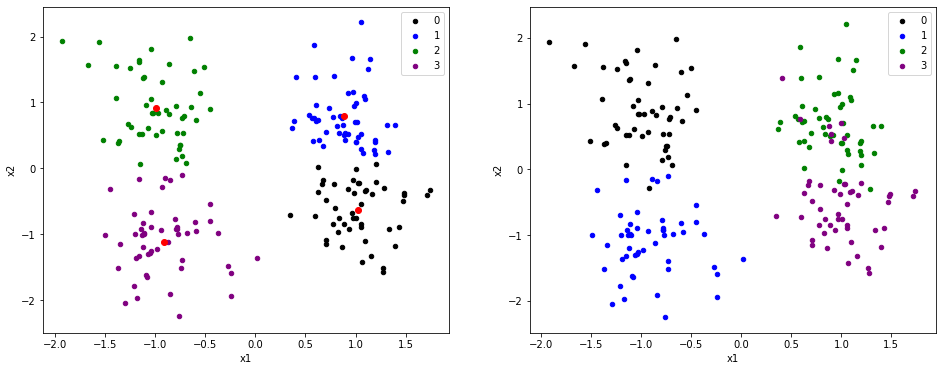

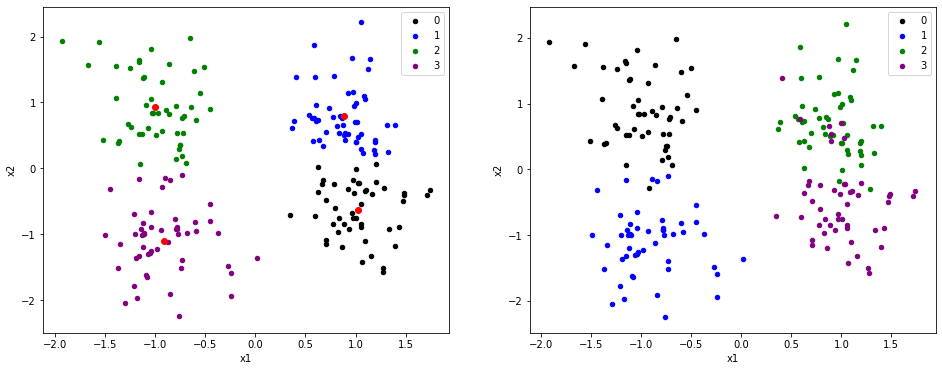

In [26]:
for i in range(10):
    data = recenter(data, data_s)